# <img src="./assets/course-icon.png" style="height:50px;display:inline"> Learning Methods of Deep Learning
---

create by Deepfinder



### <img src="https://img.icons8.com/bubbles/50/000000/checklist.png" style="height:50px;display:inline"> Agenda
---

1. 师徒相授：有监督学习（Supervised Learning）
2. 见微知著：无监督学习（Un-supervised Learning）
3. 无师自通：自监督学习（Self-supervised Learning）
4. 以点带面：半监督学习（Semi-supervised learning）
5. 明辨是非：对比学习（Contrastive Learning）
6. 举一反三：迁移学习（Transfer Learning）
7. **针锋相对：对抗学习（Adversarial Learning）**
8. 众志成城：集成学习(Ensemble Learning) 
9. 殊途同归：联邦学习（Federated Learning）
10. 百折不挠：强化学习（Reinforcement Learning）
11. 求知若渴：主动学习（Active Learning）
12. 万法归宗：元学习（Meta-Learning）

## <img src="https://img.icons8.com/cute-clipart/64/000000/alarm.png" style="height:50px;display:inline"> The Adversarial Mechanism
---
生成对抗网络（GAN）是深度学习领域的一个革命性概念，为数据生成提供了一种全新的方式。其名称中的**对抗**体现了核心思想：通过两个神经网络之间的相互竞争来生成数据。

这两个网络分别是：生成器 (Generator) 和判别器 (Discriminator)。

想象一个例子，生成对抗网络如同一场精心编排的艺术表演。舞台上有两位主要的艺术家：生成器和判别器。

* 生成器充满创意和魔法，从无中创造，挥动画笔，尝试制作最美的画作。它从一个随机的灵感（噪声向量）出发，试图创作令人信服的作品。

* 而在舞台的另一侧，判别器则扮演着批评家的角色，目光锐利，不放过任何瑕疵。当它面前展示的作品来源于真实世界时，它欣然点头；但当作品出自生成器之手，它便细细审查，决定这是真品还是赝品。这个判别过程不断地反馈给生成器，告诉它在哪里做得不够好，需要改进。

* 这场舞蹈是一个持续的迭代过程，双方互相挑战，共同成长。

* 随着时间的流逝，生成器的技巧变得越来越纯熟，而判别器的鉴赏能力也日益提高。最终，我们希望在这场舞蹈中，生成器能够创作出如此高质量的作品，以至于即使是最尖锐的批评家——判别器，也无法区分其真伪。
---

具体来说：

在生成对抗网络的舞台上，生成器扮演着一个充满创意的艺术家角色。这位“艺术家”从一个随机向量中汲取灵感，通过一系列神经网络层（如卷积或全连接层）将其转化为有形的作品。与真实世界的艺术家（真实的数据）不断练习和修正技巧以完善作品的过程相似，生成器也不断地调整自己的参数，以使其产生的作品更加逼真。其目标是创作出令人信服的数据，以至于判别器——这位严格的艺术评论家，难以区分其真伪。因此，**生成器不仅是一个创作者，更是一个终身学习者，不断地通过判别器的反馈来完善自己的“艺术技巧”**。

而判别器是那位批判眼光犀利的艺术评论家。它对每一件作品都进行严格的审查，通过其内部由多个神经网络层（例如卷积层或全连接层）组成的复杂机制，判定这件作品是否为真实世界的佳作，还是生成器所创作的模仿品。判别器在接收到数据后，通过其网络结构输出一个评分，表示这份数据的真实性概率。其核心任务是正确地识别出真实数据和生成数据，并通过其判断为生成器提供宝贵的反馈，使其有机会更进一步地完善自己的创作技能。因此，**判别器既是一个严苛的评审，也是生成器成长道路上的关键引导者**。


<center><img src="./assets/gan2.png" style="height:300px"></center>


In [1]:

import torch as t
from torch import nn
from torch.autograd import Variable
from torch.optim import Adam
from torchvision import transforms
from torchvision.utils import make_grid
from torchvision.datasets import CIFAR10, MNIST
from pylab import plt
%matplotlib inline

class Config:
    lr = 0.0002
    nz = 100 # noise dimension
    image_size = 64
    image_size2 = 64
    nc = 1 # chanel of img 
    ngf = 64 # generate channel
    ndf = 64 # discriminative channel
    beta1 = 0.5
    batch_size = 32
    max_epoch = 10 # =1 when debug
    workers = 2
    gpu = True # use gpu or not
    
opt=Config()

# data preprocess
transform=transforms.Compose([
                transforms.Resize(opt.image_size),
                transforms.ToTensor(),
                transforms.Normalize([0.5], [0.5])
                ])

dataset=MNIST(root='data', transform=transform, download=True)
# dataloader with multiprocessing
dataloader=t.utils.data.DataLoader(dataset,
                                   opt.batch_size,
                                   shuffle=True,
                                   num_workers=opt.workers)
# define model
netg = nn.Sequential(
    nn.ConvTranspose2d(opt.nz,opt.ngf*8,4,1,0,bias=False),
    nn.BatchNorm2d(opt.ngf*8),
    nn.ReLU(True),

    nn.ConvTranspose2d(opt.ngf*8,opt.ngf*4,4,2,1,bias=False),
    nn.BatchNorm2d(opt.ngf*4),
    nn.ReLU(True),

    nn.ConvTranspose2d(opt.ngf*4,opt.ngf*2,4,2,1,bias=False),
    nn.BatchNorm2d(opt.ngf*2),
    nn.ReLU(True),

    nn.ConvTranspose2d(opt.ngf*2,opt.ngf,4,2,1,bias=False),
    nn.BatchNorm2d(opt.ngf),
    nn.ReLU(True),

    nn.ConvTranspose2d(opt.ngf,opt.nc,4,2,1,bias=False),
    nn.Tanh()
)

netd = nn.Sequential(
    nn.Conv2d(opt.nc,opt.ndf,4,2,1,bias=False),
    nn.LeakyReLU(0.2,inplace=True),

    nn.Conv2d(opt.ndf,opt.ndf*2,4,2,1,bias=False),
    nn.BatchNorm2d(opt.ndf*2),
    nn.LeakyReLU(0.2,inplace=True),

    nn.Conv2d(opt.ndf*2,opt.ndf*4,4,2,1,bias=False),
    nn.BatchNorm2d(opt.ndf*4),
    nn.LeakyReLU(0.2,inplace=True),

    nn.Conv2d(opt.ndf*4,opt.ndf*8,4,2,1,bias=False),
    nn.BatchNorm2d(opt.ndf*8),
    nn.LeakyReLU(0.2,inplace=True),

    nn.Conv2d(opt.ndf*8,1,4,1,0,bias=False),
    nn.Sigmoid()
)

## <img src="https://img.icons8.com/?size=100&id=bJclkWKA0ENc&format=png&color=000000" style="height:50px;display:inline">GAN模型与损失详解
---
<center><img src="./assets/gan2.png" style="height:300px"></center>

当谈论传统的 GAN 时, 它的目标函数是一个两人零和博弈, 其中生成器 ( $G$ ) 和判别器 ( $D$ ) 有对立的目标。博弈过程可以表示为:
$$
\min _G \max _D \mathcal{L}(D, G)=\mathrm{E}_{x \sim p_{\text {data }}(x)}[\log D(x)]+\mathrm{E}_{z \sim p_z(z)}[\log (1-D(G(z)))]
$$

* 外部的最小化 (min) 代表生成器 $G$ 的目标。生成器希望最小化判别器对其生成的样本产生的正确分类概率。换句话说, 生成器试图骗过判别器, 让其认为生成的样本是真实的。
* 内部的最大化 (max)代表判别器 $D$ 的目标。判别器希望最大化其对真实和生成样本的分类能力。

生成对抗网络的核心思想是在生成器（Generator）和判别器（Discriminator）之间建立一个竞争关系。为了使这种竞争有效，需要为这两个网络定义适当的损失函数。在最基本的GAN中，生成器的任务是生成能够欺骗判别器的数据。具体来说，生成器希望判别器认为其生成的数据尽可能地接近真实数据。因此，生成器的损失函数通常基于判别器对生成数据的评估。

假设 $G$ 是生成器, $D$ 是判别器。当给定一个随机噪声向量 $z$ 时, 生成器 $G$ 生成一个数据 $G(z)$ 。

判别器 $D$ 评估这个数据并给出一个概率 $D(G(z))$, 表示它认为 $G(z)$ 是真实数据的概率。

生成器希望 $D(G(z))$ 尽可能地接近 1, 即判别器被欺骗并认为生成数据是真实的。

**单独考虑生成器：**

如果只考虑从生成器产生的图片, 而忽略真实数据的影响 $\left(\mathrm{E}_{x \sim p_{d: 18}(x)}[\log D(x)]=0\right)$, 原始的GAN损失可以简写为:
$$
L_G=\mathrm{E}_{z \sim p_z(z)}[\log (1-D(G(z)))]
$$

公式解释: 

* 当 $D(G(z))$ 接近 1 时, 意味着判别器几乎完全确信生成的数据是真实的。此时, $1-D(G(z))$ 接近 0 , 而 $\log (1-D(G(z)))$ 的值会是一个很大的负数。这正是我们所期望的最小化生成器损失。
* 当 $D(G(z))$ 接近 0 时, 意味着判别器认为生成的数据是假的。在这种情况下, $1-D(G(z))$ 接近 1, 因此 $\log (1-D(G(z)))$ 接近 0 。生成器会尽量避免这种情况, 因为生成器的目标是最小化 $\log (1-D(G(z)))$, 这实际上是鼓励生成器产生能够欺骗判别器的数据。

#### <img src="https://img.icons8.com/?size=100&id=91CnU00i6HLv&format=png&color=000000" style="height:50px;display:inline"> **为什么损失公式中会存在一个log？**

**单独考虑判别器：**

如果只考虑判别器的角度，GAN的损失函数主要关注于判别器如何区分真实数据和生成的数据。对于判别器 $D$, 损失函数为:
$$
L_D=\mathrm{E}_{x \sim p_{\text {data }}(x)}[\log D(x)]+\mathrm{E}_{z \sim p_z(z)}[\log (1-D(G(z)))]
$$

损失函数由两部分组成:

(1) $\mathrm{E}_{x \sim p_{\text {data}}(x)}[\log D(x)]$ : 这部分是关于真实数据的。判别器 $D$ 试图最大化对真实数据样本 $x$ 的正确分类概率。换句话说, 它希望对于来自真实数据分布的样本 $x$, 输出尽可能接近 1 。

(2) $\mathrm{E}_{z \sim p_(z)}[\log (1-D(G(z)))]$ : 这部分是关于生成的数据的。判别器 $D$ 试图最大化其对生成数据的正确分类概率, 即将其分类为假的。这意味着, 对于从先验噪声分布 $p_z$ 中采样然后通过生成器 $G$ 生成的假样本, 判别器的输出应该尽可能接近 0 。

判别器 $D$ 的**目标是最大化损失函数**。这意味着, 为了达到最佳效果, 判别器希望能够准确地区分真实数据和生成的数据。在最理想的情况下, 对于真实数据, $D(x)=1$; 而对于生成的数据， $D(G(x))=0$。

但在实际训练中，这种理想情况很少达到，因为生成器也在尝试改进自己，生成更逼真的样本来欺骗判别器。

In [2]:
# optimizer
optimizerD = Adam(netd.parameters(),lr=opt.lr,betas=(opt.beta1,0.999))
optimizerG = Adam(netg.parameters(),lr=opt.lr,betas=(opt.beta1,0.999))

# criterion
criterion = nn.BCELoss()

fix_noise = Variable(t.FloatTensor(opt.batch_size,opt.nz,1,1).normal_(0,1))
if opt.gpu:
    fix_noise = fix_noise.cuda()
    netd.cuda()
    netg.cuda()
    criterion.cuda()  

### GAN模型的训练
---

GAN 模型在开始训练之前, 首先需要选择一个合适的神经网络结构。例如, 对于图像生成, 一般基于卷积的结构偏多。初始化生成器 $G$ 和判别器 $D$ 的权重, 通常使用小的随机值。 GAN 包括两个网络: 生成器和判别器, 它们需要交替或同时训练。GAN 的循环训练大致如下:

* 首先训练判别器，使用当前的生成器生成假数据和真实数据训练判别器，判别器的目标是正确地区分真实数据和假数据。

具体来说，一方面从真实数据分布中抽取一个批量的数据 $x$, 计算判别器 $D$ 在真实数据上的输出 $D(x)$, 计算损失 $\mathrm{E}_{x \sim p_{\text {deta }}(x)}[\log D(x)]$ 。另一方面从随机噪声分布中抽取一个批量的噪声 $z$ 。使用生成器 $G$ 生成一个批量的假数据 $G(z)$ 。计算判别器 $D$ 在假数据上的输出 $D(G(z))$, 计算损失 $\mathrm{E}_{z \sim p_z(z)}[\log (1-D(G(z)))]$ 。合并真实数据和生成数据的损失，使用这个总损失来更新判别器 $D$ 的权重，通常使用优化器如Adam或RMSProp。

* 然后训练生成器，试图欺骗判别器，使其认为生成的数据是真实的，生成器的目标是生成能够被判别器误判为真实数据的数据。

具体来说，从随机噪声分布中再次抽取一个批量的噪声 $Z$, 通过判别器 $D$ 评估生成器 $G$ 产生的假数据, 计算损失 $\mathrm{E}_{z \sim p_z(z)}[\log (1-D(G(z)))]$,使用该损失更新生成器 $G$ 的权重。

每隔几个轮次，可以使用一些指标来评估生成器的输出。重复上述训练步骤直到满足终止条件，这可以是预定的训练轮数、模型性能达到某个阈值或其它条件。如果未满足条件，返回并开始新的训练循环。

在循环训练过程中，生成器和判别器都会逐渐改进，争取更好地执行其任务。最终的目标是找到一个平衡点，生成器生成的数据与真实数据几乎无法区分。**这种逐步的、反复的训练方法允许模型从数据中学习和适应，这是许多机器学习算法成功的关键。**

<center><img src="./assets/gan2.png" style="height:300px"></center>

Iteration 0/0: Discriminator Loss: 0.0084, Generator Loss: 6.3695, D(x): 0.9990, D(G(z)) (on fake data): 0.0050, D(G(z)) (on real data): 0.0072
Iteration 500/0: Discriminator Loss: 0.0135, Generator Loss: 5.0962, D(x): 0.9909, D(G(z)) (on fake data): 0.0149, D(G(z)) (on real data): 0.0044
Iteration 1000/0: Discriminator Loss: 0.0010, Generator Loss: 7.0314, D(x): 0.9996, D(G(z)) (on fake data): 0.0019, D(G(z)) (on real data): 0.0006
Iteration 1500/0: Discriminator Loss: 0.7012, Generator Loss: 1.0979, D(x): 0.6444, D(G(z)) (on fake data): 0.4389, D(G(z)) (on real data): 0.1342


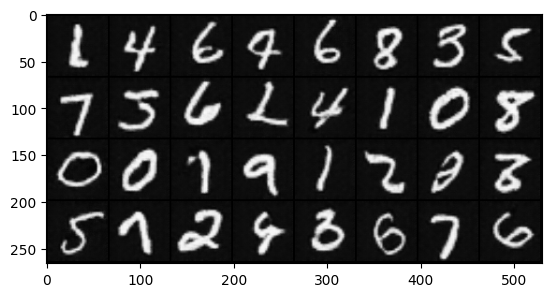

Iteration 0/1: Discriminator Loss: 0.0329, Generator Loss: 3.9298, D(x): 0.9901, D(G(z)) (on fake data): 0.0524, D(G(z)) (on real data): 0.0220
Iteration 500/1: Discriminator Loss: 0.0065, Generator Loss: 6.4350, D(x): 0.9996, D(G(z)) (on fake data): 0.0025, D(G(z)) (on real data): 0.0060
Iteration 1000/1: Discriminator Loss: 0.2043, Generator Loss: 4.6965, D(x): 0.9954, D(G(z)) (on fake data): 0.0191, D(G(z)) (on real data): 0.1569
Iteration 1500/1: Discriminator Loss: 0.0110, Generator Loss: 6.9614, D(x): 0.9992, D(G(z)) (on fake data): 0.0025, D(G(z)) (on real data): 0.0101
Iteration 0/2: Discriminator Loss: 0.0039, Generator Loss: 8.1376, D(x): 0.9999, D(G(z)) (on fake data): 0.0004, D(G(z)) (on real data): 0.0039
Iteration 500/2: Discriminator Loss: 0.0001, Generator Loss: 9.3291, D(x): 1.0000, D(G(z)) (on fake data): 0.0001, D(G(z)) (on real data): 0.0001
Iteration 1000/2: Discriminator Loss: 0.0001, Generator Loss: 9.8352, D(x): 1.0000, D(G(z)) (on fake data): 0.0001, D(G(z)) (o

In [ ]:
import matplotlib.pyplot as plt

# 存储每个迭代的损失
losses_D = []
losses_G = []

for epoch in range(opt.max_epoch):
    for ii, data in enumerate(dataloader, 0):
        real, _ = data
        input = Variable(real)  # 将真实图像包装为PyTorch变量，用于计算图中
        label = Variable(t.ones(input.size(0)))  # 创建与真实图像数量相同的标签变量，所有值为1，表示真实数据
        noise = t.randn(input.size(0), opt.nz, 1, 1)  # 生成与真实图像数量相同的随机噪声，用于生成假图像
        noise = Variable(noise)  # 将随机噪声包装为PyTorch变量，用于计算图中
        
        if opt.gpu:
            noise = noise.cuda()
            input = input.cuda()
            label = label.cuda()
        
        # ----- train netd -----
        netd.zero_grad()
        ## train netd with real img
        output = netd(input)
        error_real = criterion(output.squeeze(), label)
        error_real.backward()
        D_x = output.data.mean()
        ## train netd with fake img
        fake_pic = netg(noise).detach()
        output2 = netd(fake_pic)
        label.data.fill_(0)  # 0 for fake
        error_fake = criterion(output2.squeeze(), label)
        error_fake.backward()
        D_x2 = output2.data.mean()
        error_D = error_real + error_fake
        optimizerD.step()
        
        # ------ train netg -------
        netg.zero_grad()
        label.data.fill_(1)
        noise.data.normal_(0, 1)
        fake_pic = netg(noise)
        output = netd(fake_pic)
        error_G = criterion(output.squeeze(), label)
        error_G.backward()
        optimizerG.step()
        D_G_z2 = output.data.mean()

        # 存储损失值
        losses_D.append(error_D.item())
        losses_G.append(error_G.item())
        
        if ii % 500 == 0:
            print(f"Iteration {ii}/{epoch}: "
                  f"Discriminator Loss: {error_D.item():.4f}, "
                  f"Generator Loss: {error_G.item():.4f}, "
                  f"D(x): {D_x:.4f}, "
                  f"D(G(z)) (on fake data): {D_G_z2:.4f}, "
                  f"D(G(z)) (on real data): {D_x2:.4f}")
    if epoch % 2 == 0:
        fake_u = netg(fix_noise)
        imgs = make_grid(fake_u.data * 0.5 + 0.5).cpu()  # CHW
        plt.imshow(imgs.permute(1, 2, 0).numpy())  # HWC
        plt.show()

# 绘制损失图像
plt.figure(figsize=(10, 5))
plt.title("Generator and Discriminator Loss During Training")
plt.plot(losses_G, label="G")
plt.plot(losses_D, label="D")
plt.xlabel("iterations")
plt.ylabel("Loss")
plt.legend()
plt.show()


## <img src="https://img.icons8.com/?size=100&id=tlQgjxHobhnD&format=png&color=000000" style="height:50px;display:inline">Improved GAN 
---
“Improved Techniques for Training GANs”是一篇由Ian J. Goodfellow 和他的同事在 2016 年发表的论文，这篇论文对生成对抗网络（GANs）的训练过程做出了重要的改进和提议。这些改进主要集中在提高GANs的稳定性和性能上，解决了一些早期GANs训练中的常见问题，例如**模式崩溃（mode collapse）**。

<center><img src="./assets/gan3.png" style="height:200px"></center>

当训练GAN时，理想情况下希望生成器能够学习到数据分布的各个方面，以产生多样性且逼真的数据。然而，模式崩溃指的是生成器开始生成极其有限的样本种类，即便这些样本能够以很高的成功率欺骗判别器。换句话说，生成器找到了一种“捷径”，只生成某些特定的样本（这些样本可能在判别器当前状态下难以被识别为假的），而忽视了数据的其它特征和多样性。这导致生成的数据虽然逼真，但多样性严重不足。

发生模式崩溃的主要原因是GANs模型的不稳定性。例如，如果判别器学习得太快，生成器可能会找到并重复使用能够通过判别器的某些特定模式，而不是学习更多样化的数据生成策略。即，**如果生成器和判别器之间的训练不够平衡，可能会导致一方过于强大，从而促使另一方采取极端策略。**

不稳定性的根源是由于GANs的训练本质上是一个两个网络（生成器和判别器）之间的博弈过程，这个过程可能会非常不稳定。**在理想情况下，两者应该达到纳什均衡，但在实际操作中，往往很难实现**。例如：

- 如果判别器太强，它将过于容易地区分出生成器的输出，导致生成器收到的梯度信号过于强烈和尖锐。这可能使得生成器在训练过程中找不到提升其生成质量的方向，进而陷入困境，无法产生足够逼真的数据。
- 如果判别器太弱，它不能提供足够的准确反馈给生成器。这样生成器即使产生低质量的输出也能“蒙混过关”，使得其没有足够的激励去改进和学习生成更高质量的数据。

想象一个场景，在这个场景中，学生的任务是学习如何绘制非常逼真的风景画来“欺骗”老师，而老师的任务是要分辨出这些画作是学生绘制的，还是由真正的艺术家创作的。如果老师非常有经验（即判别器太强），能够轻易地识别出所有学生的画作，不管他们的质量如何。这会导致以下几个问题：

- 学生（生成器）感到灰心，学生可能会因为自己的作品总是被轻易辨识出来而感到沮丧，逐渐失去改进作品的动力或方向，不知道应该如何进步。其次，缺乏有效反馈，老师可能仅仅告诉学生“这是错误的”，而没有给出具体的改进建议，使得学生难以从中学到如何改进他们的绘画技巧。
- 如果老师的判断能力较弱（即判别器太弱），则会出现学生缺乏挑战，如果老师几乎总是认为学生的作品是真正艺术家的作品，学生可能会觉得自己已经“掌握”了绘画技巧，而实际上他们的作品质量并不高。由于缺乏适当的挑战和准确的反馈，学生可能在自满中停止进步，或不知道自己需要在哪些方面进行提升。

**模式崩溃的解决方法：**

    特征匹配
    小批量判别器
    单侧标签平滑
    虚拟批规范化


## <img src="https://img.icons8.com/dusk/64/000000/prize.png" style="height:50px;display:inline"> Credits
---
* Icons made by <a href="https://www.flaticon.com/authors/becris" title="Becris">Becris</a> from <a href="https://www.flaticon.com/" title="Flaticon">www.flaticon.com</a>
* Icons from <a href="https://icons8.com/">Icons8.com</a> - https://icons8.com
* <a href="https://d2l.ai/chapter_recurrent-neural-networks/index.html">Dive Into Deep Learning - Recurrent Neural Networks</a>
* <a href="https://atcold.github.io/pytorch-Deep-Learning/en/week12/12-1/">DS-GA 1008 - NYU CENTER FOR DATA SCIENCE - Deep Sequence Modeling</a>
* <a href="https://pytorch.org/tutorials/beginner/text_sentiment_ngrams_tutorial.html">Text classification with the torchtext library
</a>
* <a href="https://www.borealisai.com/research-blogs/tutorial-17-transformers-iii-training/">Tricks For Training Transformers - Borealis AI - P. Xu, S. Prince</a>
* <a href="https://taldatech.github.io">Tal Daniel</a>